In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import matplotlib.pyplot as plt
import numpy as np

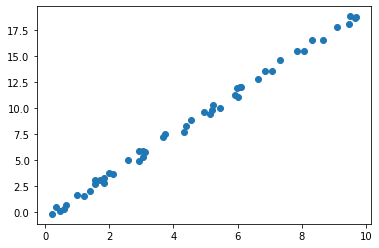

In [3]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x,y);

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression(fit_intercept=True)

In [6]:
X = x.reshape(50,1)
X.shape

(50, 1)

In [7]:
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[2.00660766]
-0.5350275750800026


In [8]:
model.score(X, y) #정확도

0.997216672827933

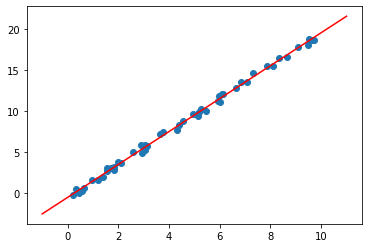

In [9]:
xfit = np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit, model.coef_ * xfit + model.intercept_, '-r');

In [10]:
#파이프라인 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [11]:
#데이터 생성
import numpy as np

def make_data(N, err=1.0, rseed=1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N) **2
  y = 10-1./(X+0.1)
  if err > 0:
    y += err * rng.rand(N)
    return X, y

  X,y = make_data(40)

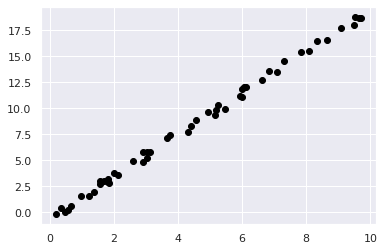

In [12]:
# 데이터 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()

X_test = np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black')
axix=plt.axis()

ValueError: ignored

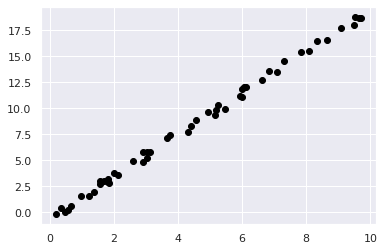

In [15]:
plt.scatter(X,y,color='black')

for degree in [1,2,3]:
  model = PolynomialRegression(degree)
  model.fit(X[:,np.newaxis],y)
  y_test = model.predict(X_test[:,np.newaxis])
  plt.plot(X_test,y_test,label=f'Degree={degree}')

plt.axis([-0.1,1.0,-2,12])
plt.legend(loc='best')

In [16]:
#데이터 검증 곡선
from sklearn.model_selection import validation_curve
degree = np.arange(1,10)

train_score, val_score = validataion_curve(PolynomialRegression(),
                                           X[:,np.newaxis],y,'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree');

NameError: ignored